## Importing Essential Libraries

In [1]:
import pandas as pd
from nltk import pos_tag, word_tokenize
from tqdm import tqdm
import nltk
import matplotlib.pyplot as plt
import seaborn as sb

## Preprocessing

### Reading the 'unigram_freq' file and displaying the top 5 rows to get a gist of it

In [2]:
data=pd.read_csv('unigram_freq.csv')
data.head()

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


### Check for any missing Data 

In [3]:
data[data['word'].isna()]

,word,count
2577,NaN,30739157
12819,NaN,3398089


##### We can delete them in this case as they are of no significance

In [4]:
data=data.dropna()
data.count()

word     333331
count    333331
dtype: int64

#### Arrange them in the order of Decreasing count values if they are not already

In [5]:
data=data.sort_values(by='count',ascending= False)

## Let`s find Top 5 most used words

Text(0.5,1,'Top 5 most used words')

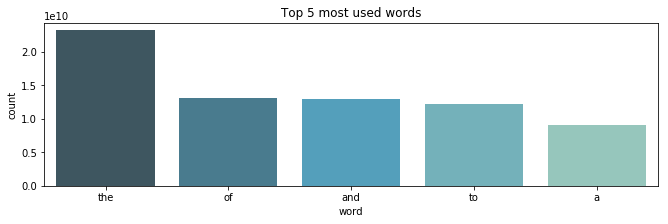

In [6]:
top5 = data.iloc[0:5]

plt.figure(figsize=(11,3))

sb.barplot("word", "count", data=top5, palette="GnBu_d").set_title("Top 5 most used words")

#### Now, lets find least used words according to this unigram_freq file

In [7]:
data['word'][data['count']==data['count'].min()]

333285                  hairclup
333278                     hooag
333279                     hogoa
333280                    hoggoo
333281                     hoaol
333282                    hhooal
333283                hervallife
333284                   hanmira
333288                    gttool
333286                     gvole
333287                gulfaircom
333289         greenwoodparkmall
333290                    gpollo
333291                     gpoge
333292                     gpoga
333276                    hoolge
333277                    hoogga
333260                    offoal
333275                   hotjops
333274               hyundaecard
333294                     gpgla
333259                     ofgle
333261                ltuairways
333262           lowinterestloan
333263    lowinterestcreditcards
333264                  loscalzo
333265                    lollge
333266                    logllo
333267                    khadka
333268                     kgool
          

#### Let`s find out with what letter most words start by:
Define a function to return the first letter of a word and apply it to the Data Frame

In [8]:
def first_letter(s):
    return s[0]

In [9]:
data['first_let']=data['word'].map(first_letter)

In [10]:
data.head()

,word,count,first_let
0,the,23135851162,t
1,of,13151942776,o
2,and,12997637966,a
3,to,12136980858,t
4,a,9081174698,a


In [11]:
df=data['first_let'].value_counts(ascending=False)
df = df.to_frame().reset_index()

To Visualize it..

Text(0.5,1,'Frequency as First letter of a word')

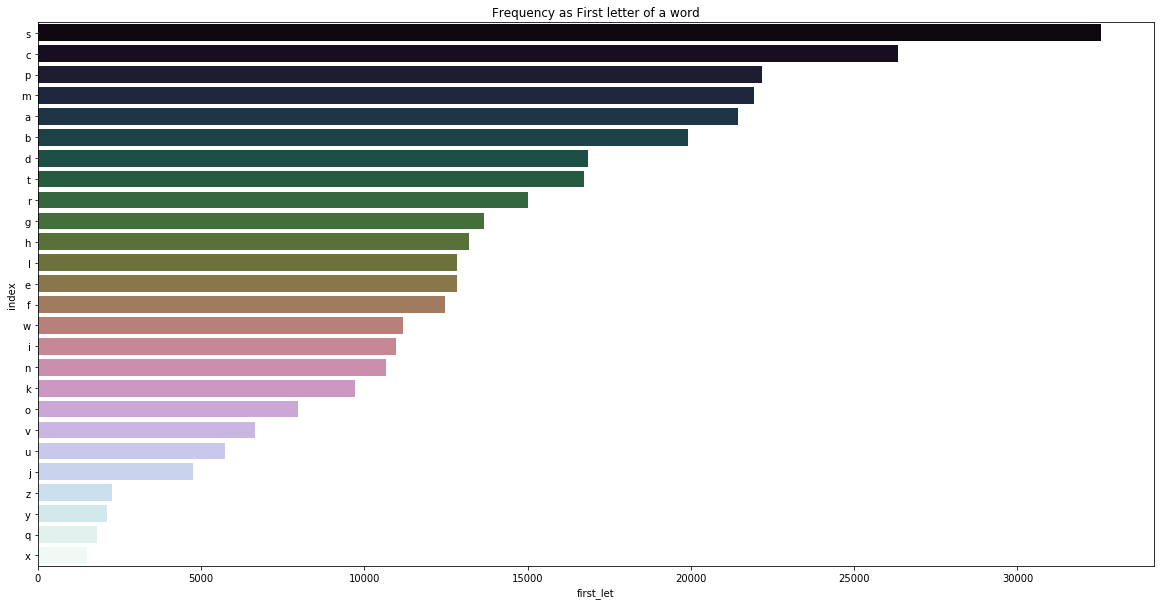

In [12]:
plt.figure(figsize=(20,10))
sb.barplot("first_let", "index", data=df, palette="cubehelix").set_title("Frequency as First letter of a word")

In [13]:
data=data[['word','count']]


## Parts of Speech

#### To find which Part of Speech is most occuring, first define a function to return POS of the word and apply it to the Data Frame. We use function 'word_tokenize' to split the sentence by word and 'pos_tag' from NLTK library to find POS of it 

In [14]:
def pos(x):
    x1=word_tokenize(x)
    return nltk.pos_tag(x1)[0][1]

In [15]:
data['pos']=0

In [16]:
data['pos'][2]

0

#### Use 'tqdm' to see the progress as it happens in a 'for' loop. We are using only top 1000 words as it takes so much longer to find POS of 333331 words in a cpu

In [17]:
for i in tqdm(range(1000)):
    data['pos'][i]=pos(data['word'][i])

  0%|                                                                                                                                                                                                                                             | 0/1000 [00:00<?, ?it/s]C:\Users\Sumanth_47\Anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\Sumanth_47\Anaconda3\lib\site-packages\pandas\core\indexing.py:194: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)
100%|██████████████████████████████████████████████████████████████████████████████████████████████████████

In [18]:
data['pos'].value_counts(ascending=False)

0       332331
NN         551
NNS        124
JJ         101
IN          42
RB          41
VBN         22
VB          20
DT          15
VBG         14
PRP         10
MD          10
VBD          8
PRP$         7
VBZ          7
CD           6
CC           4
JJS          4
WRB          4
RBR          3
VBP          2
WP           2
TO           1
WDT          1
JJR          1
Name: pos, dtype: int64

#### We can see that NN i.e; Nouns are the most occuring.

In [19]:
data=data[['word','count']]

## Is there a relation between the length of the word and occurrence of it? Let`s find out

In [20]:
def length(y):
    return len(y)

In [21]:
data['length']=data['word'].map(length)

In [22]:
data.head()

,word,count,length
0,the,23135851162,3
1,of,13151942776,2
2,and,12997637966,3
3,to,12136980858,2
4,a,9081174698,1


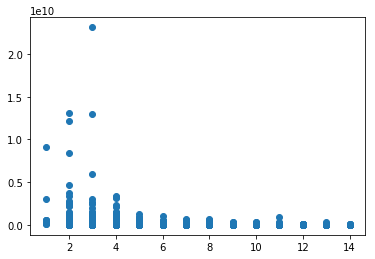

In [23]:
data2=data[data['length']<15]
plt.scatter(data2['length'],data2['count'])



Above plot gives the relation between the length of a word and occurance of it. We can see that shorter words have high occurrence usually




## To find which are the most used alphabets...

Text(0.5,1,'Alphabets')

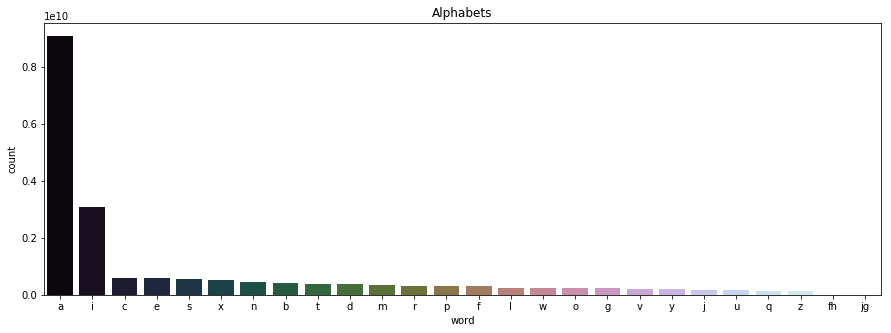

In [24]:
s = data.word.str.len().sort_values(ascending=False).index

alphabet = data.reindex(s).iloc[::-1][2:28].sort_values(by="count", ascending=False)
plt.figure(figsize=(15,5))
sb.barplot("word", "count", data=alphabet, palette="cubehelix").set_title("Alphabets")

In [25]:
data=data[['word','count']]

In [26]:
data.head()

,word,count
0,the,23135851162
1,of,13151942776
2,and,12997637966
3,to,12136980858
4,a,9081174698


## Lets find the distribution of Vowels and Consonants among the words

In [27]:
def vow_count(s):
    count = 0
    for i in s:
        if(i=='a' or i=='e' or i=='i' or i=='o' or i=='u'):
            count=count+1
    return count    

In [28]:
def cons_count(s):
    count = 0
    for i in s:
        if(i!='a' and i!='e' and i!='i' and i!='o' and i!='u' and i!=' '):
            count=count+1
    return count

In [29]:
data['vow_count']=data['word'].map(vow_count)
data['cons_count']=data['word'].map(cons_count)

In [30]:
data.tail()

,word,count,vow_count,cons_count
333232,ooahl,12711,3,2
333233,omai,12711,3,1
333234,okgol,12711,2,3
333235,okgle,12711,2,3
333332,golgw,12711,1,4


#### Lets visualize the distribution

([<matplotlib.patches.Wedge at 0x1e8926dbc18>,
 [Text(-0.444478,1.06063,'Consonants'), Text(0.463803,-1.10675,'Vowels')],
 [Text(-0.251227,0.599487,'62.6%'), Text(0.270552,-0.645602,'37.4%')])

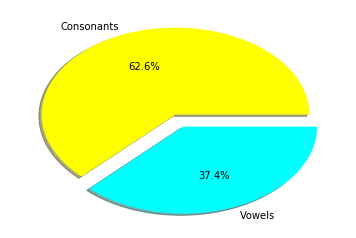

In [31]:

cons=data['cons_count'].sum()
vows=data['vow_count'].sum()
explode=(0.05,0.1)
labels=['Consonants','Vowels']
colors=['yellow', 'cyan']
plt.pie([cons,vows],explode=explode, labels=labels, colors=colors, shadow=True, autopct='%1.1f%%')